# Multiple Subplots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import numpy as np

## By hand

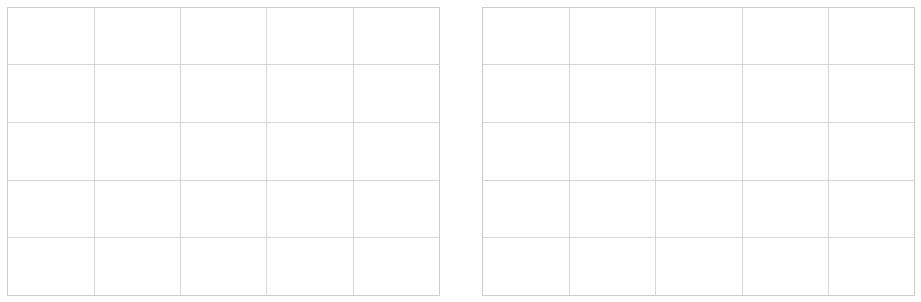

In [40]:
# Matlab interface
ax1 = plt.axes([0, 0, 1, 1], xticklabels=[], yticklabels=[])
ax2 = plt.axes([1.1, 0, 1, 1], xticklabels=[], yticklabels=[])

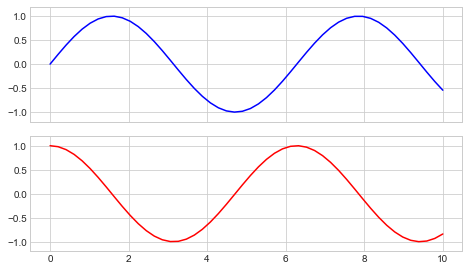

In [47]:
# object oriented
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 1, 0.4],
                  xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.05, 1, 0.4],
                  ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(x, np.sin(x), 'b');
ax2.plot(x, np.cos(x), 'r');

## Grids of Subplots

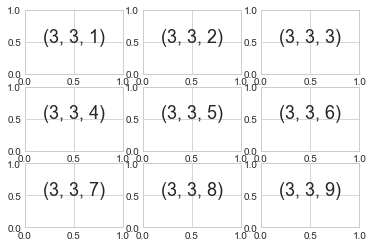

In [64]:
# With matlab interface
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.xticklabels = []
    plt.yticklabels = []
    plt.text(0.5, 0.5, str((3, 3, i)), 
            fontsize=18, ha='center')
    
    # Why doesn't changing labels work?

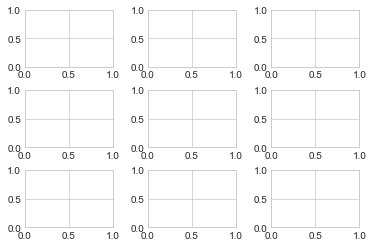

In [66]:
# With python interface
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 10):
    ax = fig.add_subplot(3, 3, i)

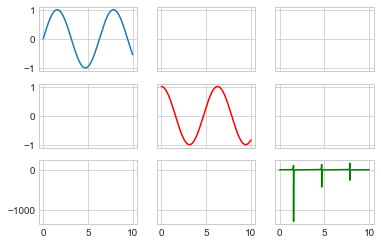

In [74]:
# Way better
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row');
ax[0,0].plot(x, np.sin(x))
ax[1, 1].plot(x, np.cos(x), 'r')
ax[2, 2].plot(x, np.tan(x), 'g')

## GridSpec

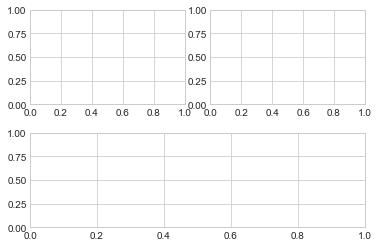

In [99]:
grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0:2])
plt.subplot(grid[0, 2:4])
plt.subplot(grid[1, 0:4])

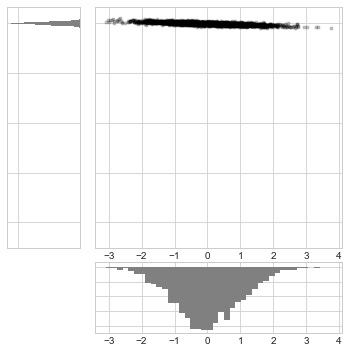

In [145]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up axes with GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharey=main_ax)

# Scatter points on main axis
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2,);

# Histogram on attached axes
x_hist.hist(x, 40, histtype='stepfilled', 
            orientation='vertical', color='gray');
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', 
            orientation='horizontal', color='gray');
y_hist.invert_xaxis()

# I have 0 idea why this is acting up